It is used for both classification and regression.

1) Classification

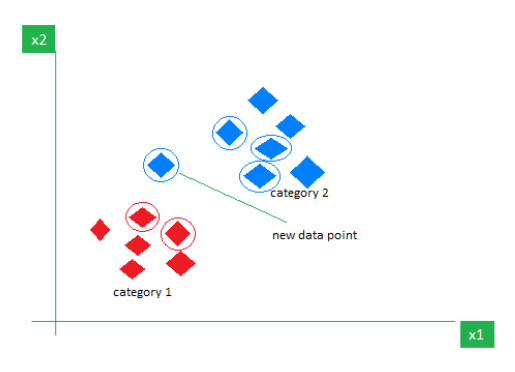

- We have to initialize the k value. (k > 0)
- Find the k nearest neighbour from the new data.
- From those k how many neighbours belong to 0 category and 1 category.

Distance Metrics
- Euclidean Distance and
- Manhattan Distance

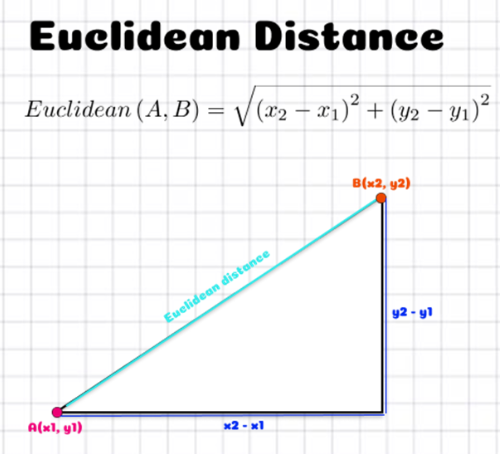

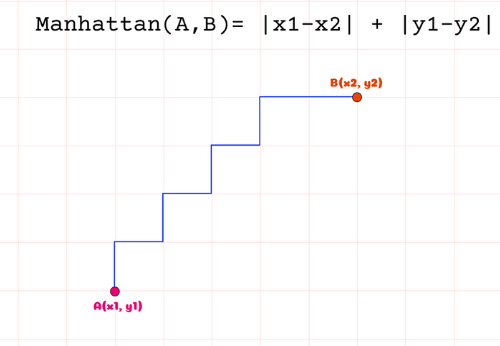

KNN Regressor --> Average of K neighbours

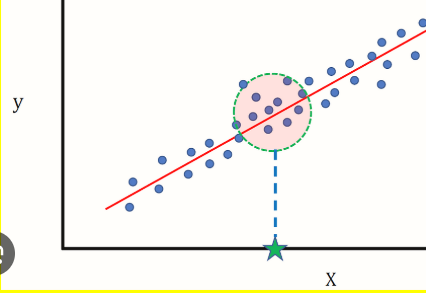

Classifier

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 1000, #1 000 observations
    n_features = 3, # total features
    n_redundant = 1,
    n_classes = 2, # binary target/label
    random_state = 999
)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto')
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[158  20]
 [ 11 141]]
0.906060606060606
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       178
           1       0.88      0.93      0.90       152

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [ ]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
              }

In [ ]:
clf = GridSearchCV(classifier, param_grid = parameters)

In [ ]:
## Splitting of train data to validation data
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
clf.best_params_

{'n_neighbors': 9}

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 9, algorithm = 'auto')

In [ ]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
## Prediction
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[156  16]
 [ 13 145]]
0.9121212121212121
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       172
           1       0.90      0.92      0.91       158

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [ ]:
# Import pickle for saving and loading the model
import pickle

# Filepath for saving the model
pickle_file_path = 'knn.pkl'

# Save the trained model to a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(classifier, file)

print(f'Model saved to {pickle_file_path}')

Model saved to knn.pkl


In [ ]:
# Load the model from the pickle file
with open(pickle_file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
# Test the loaded model with predictions
y_pred_loaded = loaded_model.predict(X_test)
print(y_pred_loaded)

[1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0
 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0
 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1
 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0]
